<p align='center'>
  <a href="https://colab.research.google.com/github/farbodnm/financial-data-classification/blob/main/financialdclass.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </a>
</p>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
print(round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset is of class 0')
print(round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset is of class 1')

99.83 % of the dataset is of class 0
0.17 % of the dataset is of class 1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Since, the dataset contains no null or missing values and all the features seem to be scaled properly, there seems to be no need of any preprocessing. Only the features Time & Amount are required to be scaled.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# std_scaler = StandardScaler()
# data['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
# data['scaled_time'] = std_scaler.fit_transform(df['time'].values.reshape(-1, 1))

rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


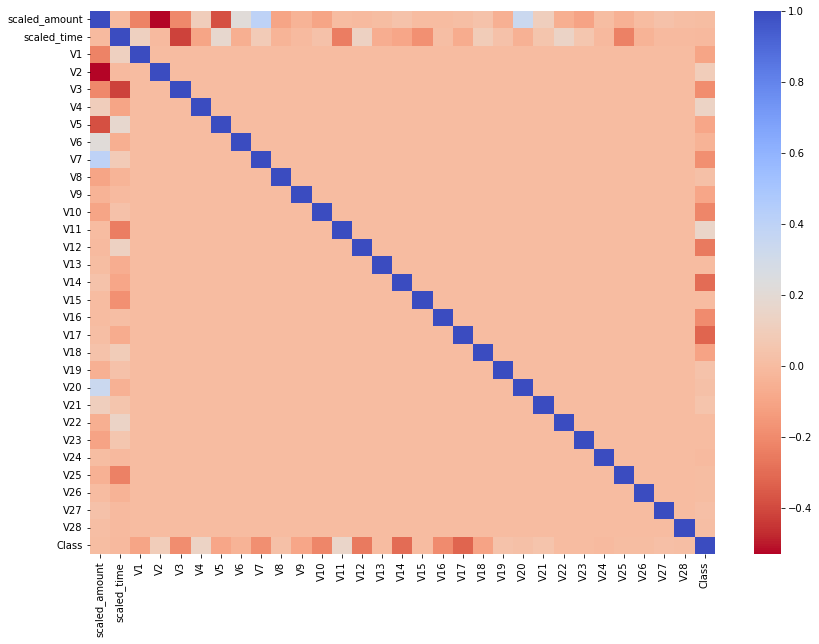

In [8]:
from matplotlib import pyplot as plt
import seaborn

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

corr = df.corr()

plt.figure(figsize=(14, 10))
seaborn.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.show()

In [9]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Class', axis=1)
y = df['Class']

rus = RandomUnderSampler(random_state=0)
X_rs, y_rs = rus.fit_resample(X,y)

In [10]:
df_under_samp = pd.DataFrame(
    np.hstack((X_rs, np.array(y_rs)[:, None])), columns=df.columns)
df_under_samp.Class = df_under_samp.Class.astype(int)
df_under_samp.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.265633,0.910384,2.049094,0.186189,-1.707198,0.530768,0.160589,-1.448570,0.239310,-0.353611,...,-0.232666,0.197782,0.741141,-0.009744,-0.085057,0.228384,-0.097292,-0.001028,-0.032390,0
1,-0.279746,0.426168,2.125540,-0.030714,-1.527653,0.121046,0.543172,-0.347988,0.157221,-0.229126,...,-0.125804,-0.336497,-0.838932,0.275173,0.049145,-0.156765,0.205919,-0.072321,-0.059009,0
2,26.768113,-0.683843,-4.155859,-5.705748,0.274699,-0.993262,-6.059393,5.210848,5.811316,0.367888,...,3.944592,1.371671,1.195815,4.188762,-1.091077,1.033044,0.224493,-0.486741,0.194275,0
3,4.164745,-0.222524,-0.566420,-0.579576,0.823503,-1.451240,-0.583587,0.206381,1.601392,-0.370446,...,0.977739,-0.065082,-0.761357,0.641524,-0.568974,-0.053164,-0.690995,-0.228630,-0.157254,0
4,-0.146720,0.614822,0.060858,-0.261762,-1.699493,-1.202327,3.699527,3.196249,0.437208,0.421541,...,-0.014550,0.008303,0.534602,0.089602,0.667918,0.017798,0.611584,-0.469946,-0.514370,0


In [11]:
print(round(df_under_samp['Class'].value_counts()[0]/len(df_under_samp) * 100,2), '% of the dataset is of class 0')
print(round(df_under_samp['Class'].value_counts()[1]/len(df_under_samp) * 100,2), '% of the dataset is of class 1')

50.0 % of the dataset is of class 0
50.0 % of the dataset is of class 1


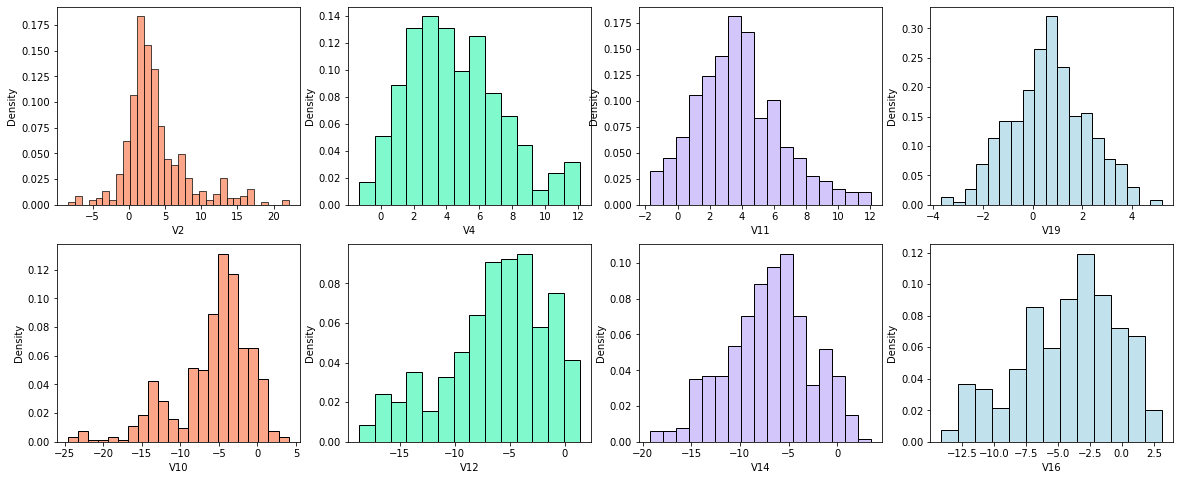

In [12]:
f, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 8))

seaborn.histplot(
    x='V2', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[0][0], stat='density', color='#FB8861')
seaborn.histplot(
    x='V4', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[0][1], stat='density', color='#56F9BB')
seaborn.histplot(
    x='V11', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[0][2], stat='density', color='#C5B3F9')
seaborn.histplot(
    x='V19', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[0][3], stat='density', color='#ADD8E6')

seaborn.histplot(
    x='V10', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[1][0], stat='density', color='#FB8861')
seaborn.histplot(
    x='V12', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[1][1], stat='density', color='#56F9BB')
seaborn.histplot(
    x='V14', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[1][2], stat='density', color='#C5B3F9')
seaborn.histplot(
    x='V16', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[1][3], stat='density', color='#ADD8E6')

plt.show()

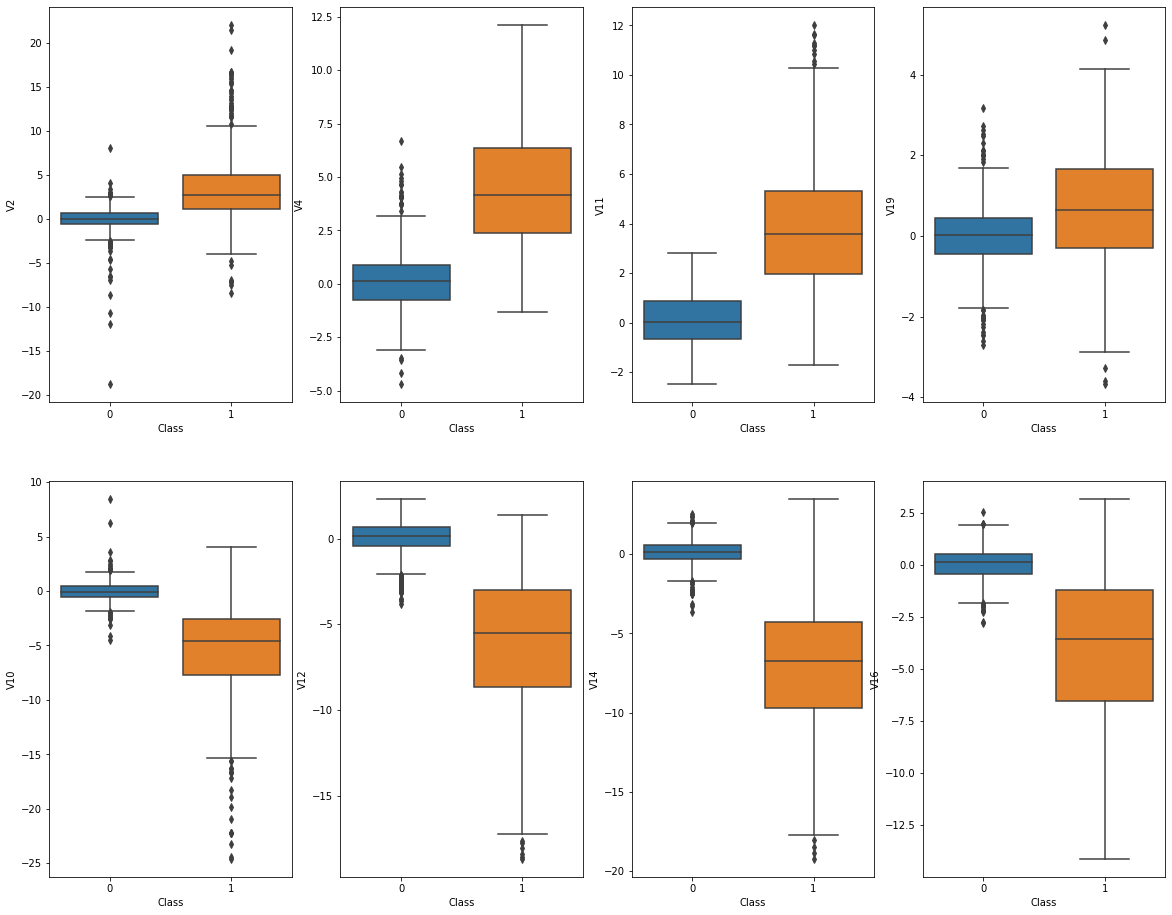

In [13]:
f, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 16))

seaborn.boxplot(x="Class", y="V2", data=df_under_samp, ax=axes[0][0])
seaborn.boxplot(x="Class", y="V4", data=df_under_samp, ax=axes[0][1])
seaborn.boxplot(x="Class", y="V11", data=df_under_samp, ax=axes[0][2])
seaborn.boxplot(x="Class", y="V19", data=df_under_samp, ax=axes[0][3])

seaborn.boxplot(x="Class", y="V10", data=df_under_samp, ax=axes[1][0])
seaborn.boxplot(x="Class", y="V12", data=df_under_samp, ax=axes[1][1])
seaborn.boxplot(x="Class", y="V14", data=df_under_samp, ax=axes[1][2])
seaborn.boxplot(x="Class", y="V16", data=df_under_samp, ax=axes[1][3])

plt.show()

In [14]:
def outlier_removal(df, feature, inclass):
  array = df[feature].loc[df['Class'] == inclass].values
  q25, q75 = np.percentile(array, 25), np.percentile(array, 75)
  print('25th percentile: {} | 75th percentile: {}'.format(q25, q75))
  iqr = q75 - q25
  print('Interquartile Range: {}'.format(iqr))
  cutoff = iqr*1.5
  lower_threshold, upper_threshold = q25 - cutoff, q75 + cutoff
  print('Cutoff: {}'.format(cutoff))
  print('Lower Threshold: {} | Upper Threshold: {}'.format(
      lower_threshold, upper_threshold))
  outliers = [a for a in array if a < lower_threshold or a > upper_threshold]
  print('{} Outliers: {}'.format(feature, outliers))
  print('Number of outliers detected for feature {}: {}'.format(
      feature, len(outliers)))
  df = df.drop(df[(df[feature] > upper_threshold) |
               (df[feature] < lower_threshold)].index)
  print('Number of records after outlier removal: {}'.format(len(df)))
  print('-'*117)
  return df

In [15]:
df_out_under_samp = outlier_removal(df_under_samp,'V10', 1)
df_out_under_samp = outlier_removal(df_out_under_samp,'V2',1)

25th percentile: -7.7566982278474725 | 75th percentile: -2.6141839131895623
Interquartile Range: 5.142514314657911
Cutoff: 7.713771471986866
Lower Threshold: -15.47046969983434 | Upper Threshold: 5.099587558797303
V10 Outliers: [-16.6496281595399, -18.2711681738888, -15.5637913387301, -15.5637913387301, -16.7460441053944, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.1415136412892, -16.3035376590131, -16.2556117491401, -16.6011969664137, -18.9132433348732, -20.9491915543611, -19.836148851696, -23.2282548357516, -24.4031849699728, -24.5882624372475]
Number of outliers detected for feature V10: 19
Number of records after outlier removal: 963
---------------------------------------------------------------------------------------------------------------------
25th percentile: 1.1453810871791 | 75th percentile: 4.48826730168204
Interquartile Range: 3.34288621450294
Cutoff: 5.01432932175441
Lower Threshold: -3.86894823457531 | Upper Threshold: 9.502596623436

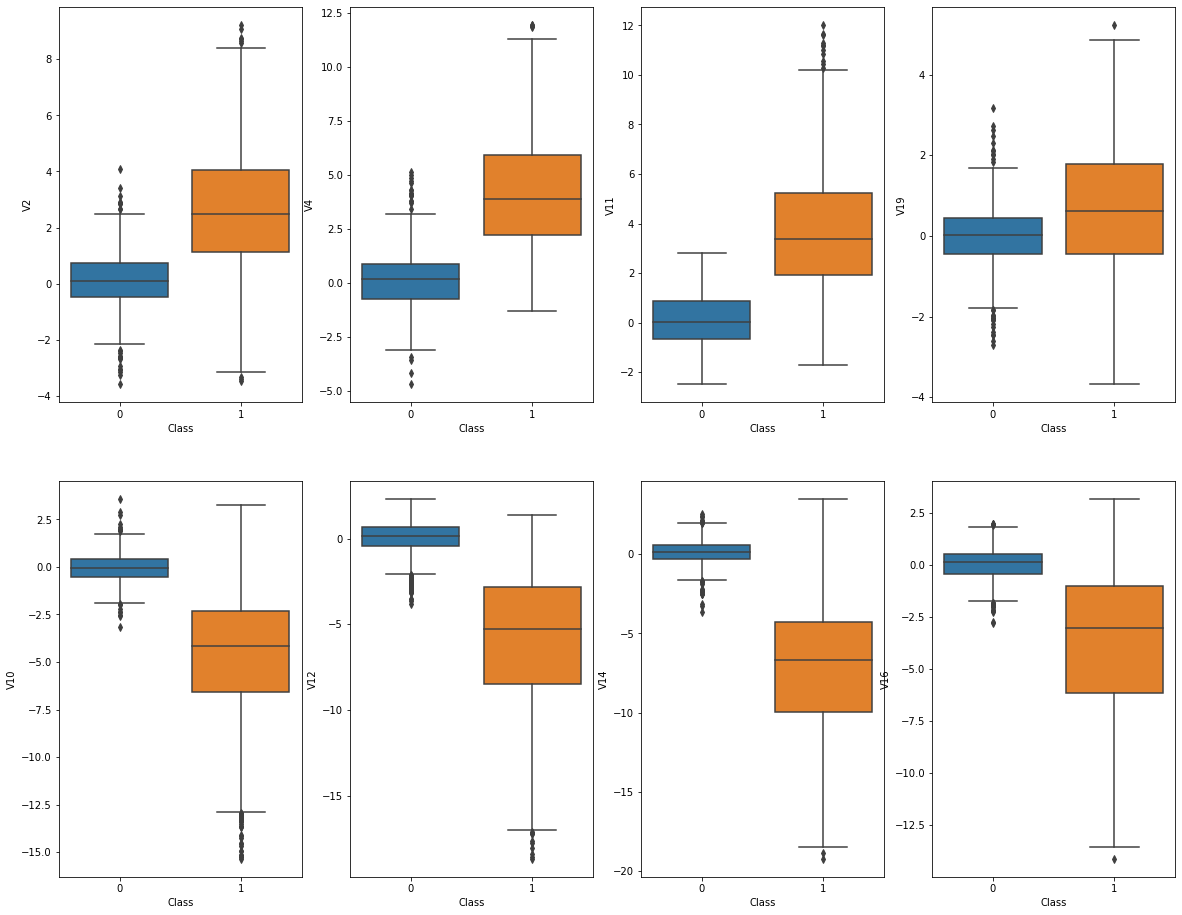

In [16]:
f, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 16))

seaborn.boxplot(x="Class", y="V2", data=df_out_under_samp, ax=axes[0][0])
seaborn.boxplot(x="Class", y="V4", data=df_out_under_samp, ax=axes[0][1])
seaborn.boxplot(x="Class", y="V11", data=df_out_under_samp, ax=axes[0][2])
seaborn.boxplot(x="Class", y="V19", data=df_out_under_samp, ax=axes[0][3])

seaborn.boxplot(x="Class", y="V10", data=df_out_under_samp, ax=axes[1][0])
seaborn.boxplot(x="Class", y="V12", data=df_out_under_samp, ax=axes[1][1])
seaborn.boxplot(x="Class", y="V14", data=df_out_under_samp, ax=axes[1][2])
seaborn.boxplot(x="Class", y="V16", data=df_out_under_samp, ax=axes[1][3])

plt.show()